# **Business Understanding**

You work for a consumer finance company that specialises in providing various types of loans to urban customers. When the company receives a loan application, it has to decide whether to approve or reject it based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.

- If the applicant is not likely to repay the loan, i.e., they are likely to default, then approving the loan may lead to financial loss for the company.


The data given below contains information about past loan applicants and whether they ‘defaulted’. The aim is to identify patterns indicating that a person is likely to default, which may be used to deny the loan, reduce the loan amount, lend (to risky applicants) at a higher interest rate, etc.



In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of defaulting.



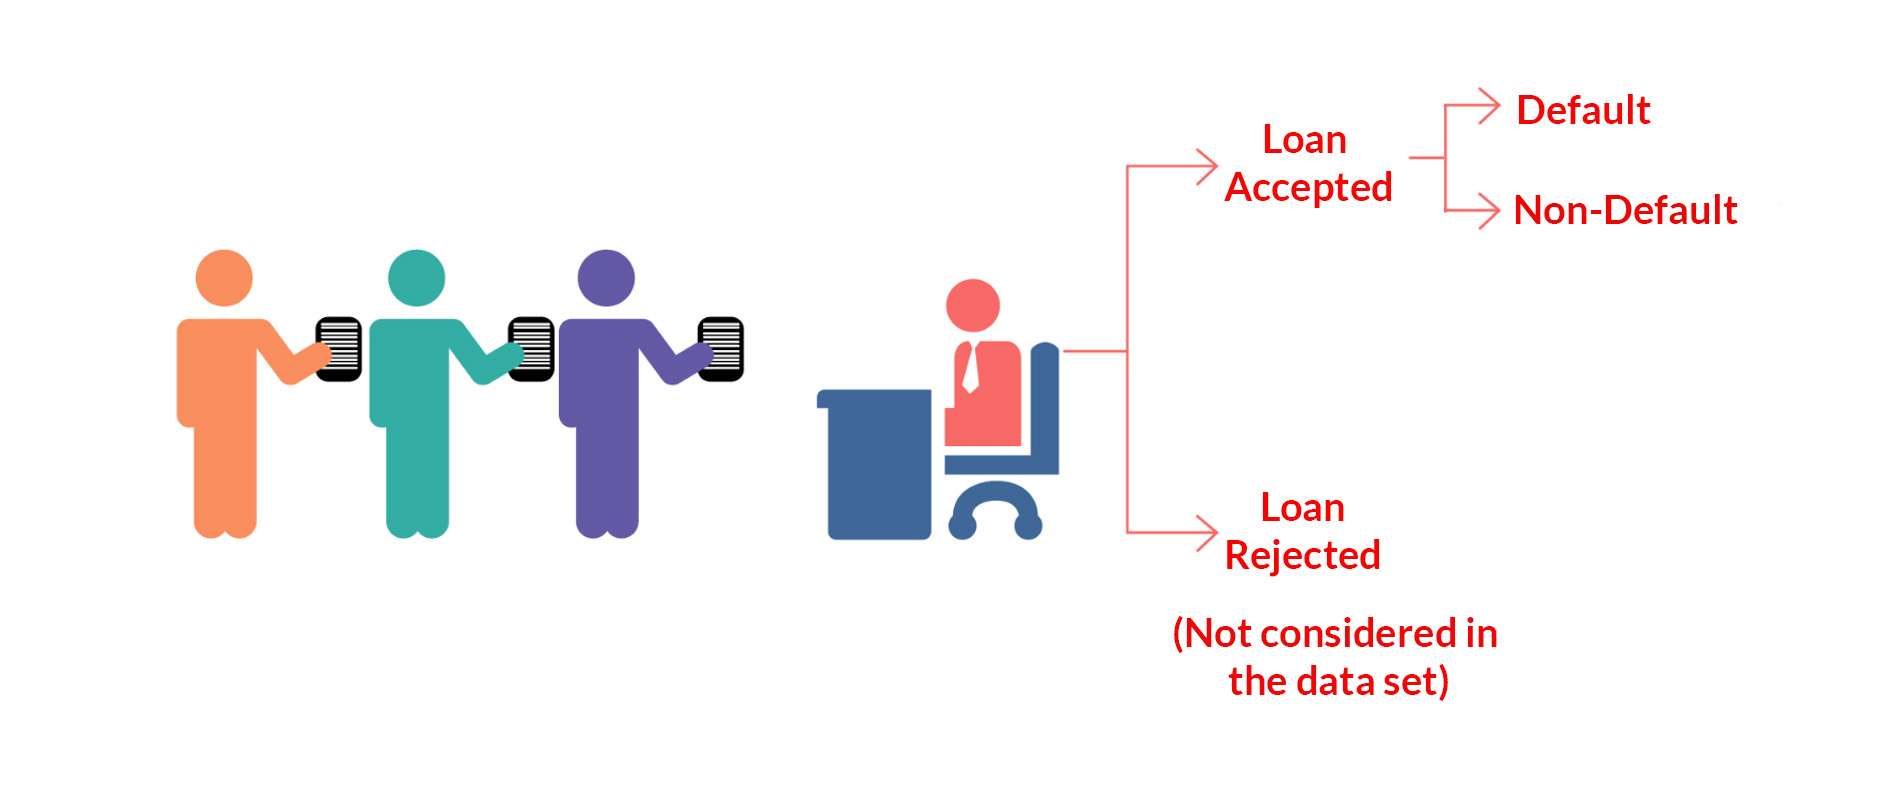

In [ ]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Data Import
df = pd.read_csv("/content/drive/MyDrive/Full Stack Machine Learning with Python (PPDC - Chennai)/Datasets/loan.csv")
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(39717, 111)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Data Cleaning

In [ ]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [ ]:
(df.isnull().sum()/len(df))*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [ ]:
# Dropping columns with 90% null values
df = df[df.columns[(df.isnull().sum()/len(df)) < 0.9]]
df.shape

(39717, 55)

In [ ]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [ ]:
#drop the duplicates
df.drop_duplicates(inplace=True)
df.shape

(39717, 55)

In [ ]:
df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [ ]:
# filtering only fully paid or charged-off
df = df[df['loan_status'] != 'Current']

In [ ]:
df.shape

(38577, 55)

In [ ]:
# Drop unnecessary columns
df.drop(['title', 'desc', 'url', 'zip_code', 'addr_state'], axis=1, inplace = True)

In [ ]:
df.shape

(38577, 50)

In [ ]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
df['int_rate'].unique()

array(['10.65%', '15.27%', '15.96%', '13.49%', '7.90%', '18.64%',
       '21.28%', '12.69%', '14.65%', '9.91%', '16.29%', '6.03%', '11.71%',
       '12.42%', '14.27%', '16.77%', '7.51%', '8.90%', '18.25%', '6.62%',
       '19.91%', '17.27%', '17.58%', '21.67%', '19.42%', '20.89%',
       '20.30%', '23.91%', '19.03%', '23.13%', '22.74%', '22.35%',
       '22.06%', '24.11%', '6.00%', '23.52%', '22.11%', '7.49%', '11.99%',
       '5.99%', '10.99%', '9.99%', '18.79%', '11.49%', '8.49%', '15.99%',
       '16.49%', '6.99%', '12.99%', '15.23%', '14.79%', '5.42%', '10.59%',
       '17.49%', '15.62%', '19.29%', '13.99%', '18.39%', '16.89%',
       '17.99%', '20.99%', '22.85%', '19.69%', '20.62%', '20.25%',
       '21.36%', '23.22%', '21.74%', '22.48%', '23.59%', '12.62%',
       '18.07%', '11.63%', '7.91%', '7.42%', '11.14%', '20.20%', '12.12%',
       '19.39%', '16.11%', '17.54%', '22.64%', '13.84%', '16.59%',
       '17.19%', '12.87%', '20.69%', '9.67%', '21.82%', '19.79%',
       '18.49%', '

In [ ]:
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float')
#df['revol_util'] = df['revol_util'].str.rstrip('%').astype('float')

In [ ]:
df['int_rate'].dtypes

dtype('float64')

In [ ]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [ ]:
s = '10 years'
s.split(' ')[0]

'10'

In [ ]:
s1 = '< 1'
s1.replace('< 1', '0.5')

'0.5'

In [ ]:
#Converting column 'emp_length' to float type, Also taking '< 1' years experience as 0.5 years experienced
df['emp_length'] = df['emp_length'].str.replace('< 1','0.5').str.replace('+','').str.split(' ').str[0].astype(float)

In [ ]:
df['emp_length'].dtypes

dtype('float64')

In [ ]:
df['emp_length'].unique()

array([10. ,  0.5,  3. ,  8. ,  9. ,  4. ,  5. ,  1. ,  6. ,  2. ,  7. ,
        nan])

In [ ]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


## **Exploratory Data Analysis**

<Axes: xlabel='loan_amnt', ylabel='Density'>

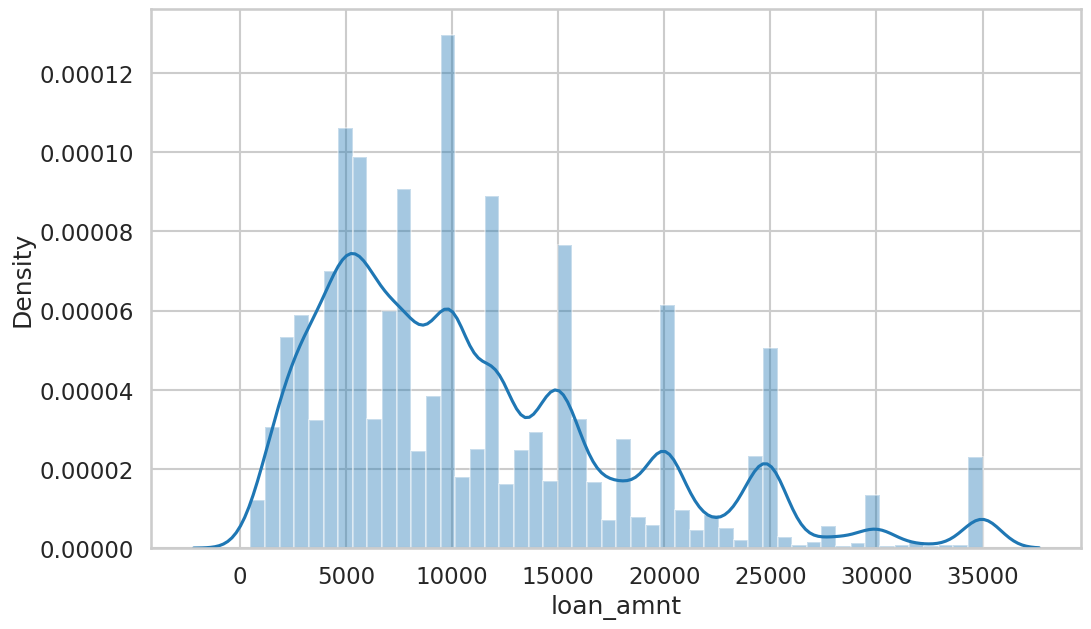

In [ ]:
#plotting loan amount
plt.figure(figsize=(12,7))
sns.distplot(df['loan_amnt'])

**Insights on Loan Amounts Density**

The graph provided illustrates the density of loan amounts, offering the following insights:

1. The highest density is around a loan amount of 5,000 Dollars. This suggests that $5,000 is the most common loan amount among the loans in this data, indicating its popularity among borrowers.

2. The loan amounts range from 0 to 35,000 Dollars. This wide range indicates a diverse set of financial needs among the borrowers, accommodating various purposes and requirements.

3. The density decreases as the loan amount increases, indicating that larger loans are less common. This decline in density could stem from stricter lending criteria for larger loans or fewer borrowers qualifying for these higher amounts.

These insights provide valuable information for lenders, allowing them to understand the distribution of loan amounts and tailor their lending practices to better meet the diverse financial needs of their applicants.


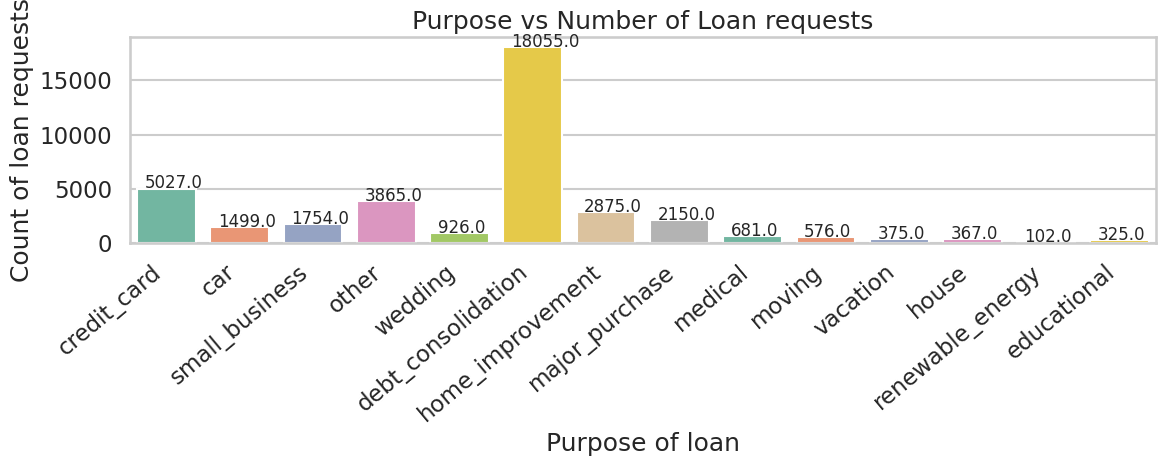

In [ ]:
# Set the font scale and style
sns.set_context("talk", font_scale=1)
sns.set_style("whitegrid")

# Create a count plot of the 'purpose' column
plt.figure(figsize=(12,5))
ax = sns.countplot(x='purpose', data=df, palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

# Add labels to the bars
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10), fontsize=12)

# Add axis labels and a title
ax.set(xlabel="Purpose of loan", ylabel="Count of loan requests")
plt.title('Purpose vs Number of Loan requests', fontsize=18)

# Show the plot
plt.tight_layout()
plt.show()

**Insights on Loan Requests**

1. Debt consolidation appears to be the most common reason for loan requests, with a total of 17,790 requests. This suggests that a significant number of people are seeking to consolidate their debts, possibly to manage them more effectively or to secure lower interest rates.

2. The second most common purpose for loan requests is credit card, followed by home improvements and car. This indicates that significant expenses such as vehicle purchases and home renovations often require financial assistance.

3. On the other end of the spectrum, educational loans have the fewest number of requests at 299. This could be due to a variety of factors, such as the availability of other funding sources for education or lower cost of education.

4. Other purposes like wedding, medical, small business, moving, house, and renewable energy also have a considerable number of loan requests, indicating a diverse range of financial needs among the loan applicants.

These insights can help financial institutions understand the borrowing needs of their customers and tailor their loan products accordingly.


In [ ]:
# Insights of Defaulters

charged_off_loans = df.loc[df.loan_status == 'Charged Off']
charged_off_loans

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,F2,...,152.39,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,B5,...,121.45,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
12,1064687,1298717,9000,9000,9000.0,36 months,13.49,305.38,C,C1,...,305.38,Nov-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
14,1069057,1303503,10000,10000,10000.0,36 months,10.65,325.74,B,B2,...,325.74,Mar-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39667,118823,118026,2500,2500,675.0,36 months,12.80,84.00,D,D4,...,1.76,May-16,NaN,1,INDIVIDUAL,0,NaN,0,NaN,0.0
39668,118533,117783,2500,2500,825.0,36 months,9.64,80.26,B,B4,...,1.40,May-16,NaN,1,INDIVIDUAL,0,NaN,0,NaN,0.0
39669,118523,118519,6500,6500,225.0,36 months,15.01,225.37,F,F1,...,225.37,May-16,NaN,1,INDIVIDUAL,0,NaN,0,NaN,0.0
39678,113179,113093,1000,1000,950.0,36 months,10.59,32.55,C,C2,...,32.55,Oct-09,NaN,1,INDIVIDUAL,0,NaN,0,NaN,0.0


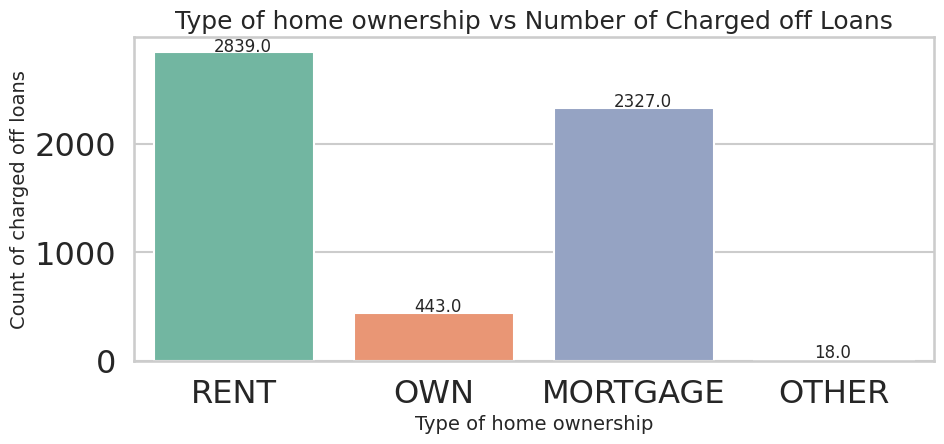

In [ ]:
# Set the font scale and style
sns.set_context("talk", font_scale=1.4)
sns.set_style("whitegrid")

# Create a count plot of the 'home_ownership' column
plt.figure(figsize=(10,5))
ax = sns.countplot(x='home_ownership', data=charged_off_loans, palette='Set2')
ax.set_xlabel("Type of home ownership", fontsize=14)
ax.set_ylabel("Count of charged off loans", fontsize=14)
plt.title('Type of home ownership vs Number of Charged off Loans', fontsize=18)

# Add labels to the bars
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+10), fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

**Insights on Charged Off Loans by Home Ownership**

1. Renters have the highest number of charged off loans, with a total of 2,630. This could suggest that renters may have less financial stability or higher financial obligations relative to their income, leading to a higher likelihood of loan default.

2. Homeowners with a mortgage are the second highest group with 2,119 charged off loans. This could be due to the financial burden of mortgage payments, which might make it more difficult for these individuals to repay other loans.

3. Those who own their homes outright have significantly fewer charged off loans, with a count of 364. This could indicate that these individuals have more financial stability or lower financial obligations.

4. The category labeled Other has the fewest charged off loans at 18. This category could include various less common types of home ownership, such as cooperative housing, land contract, or living with relatives.

These insights can help lenders understand the risk associated with different types of home ownership and adjust their lending practices accordingly.


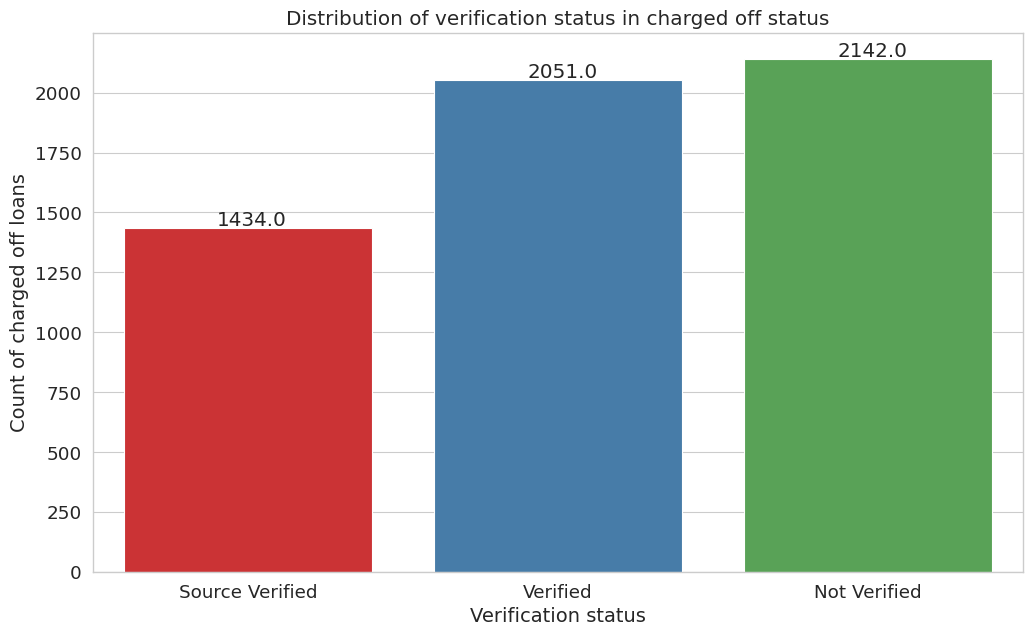

In [ ]:
plt.figure(figsize=(12,7))
sns.set_context("paper", font_scale=1.5)
ax = sns.countplot(x="verification_status", data = charged_off_loans, palette='Set1')
ax.set_xlabel("Verification status", fontsize=14)
ax.set_ylabel("Count of charged off loans", fontsize=14)
plt.title('Distribution of verification status in charged off status')
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+10))
plt.show()

**Insights on Verification Status and Charged Off Loans**

1. Not verified and Verified verification statuses show a higher count of charged off loans compared to the source verified ones. This suggests that banks should prioritize source verification to minimize credit losses.

This insight highlights the importance of thorough source verification to assess the creditworthiness of loan applicants and reduce the risk of charged off loans.

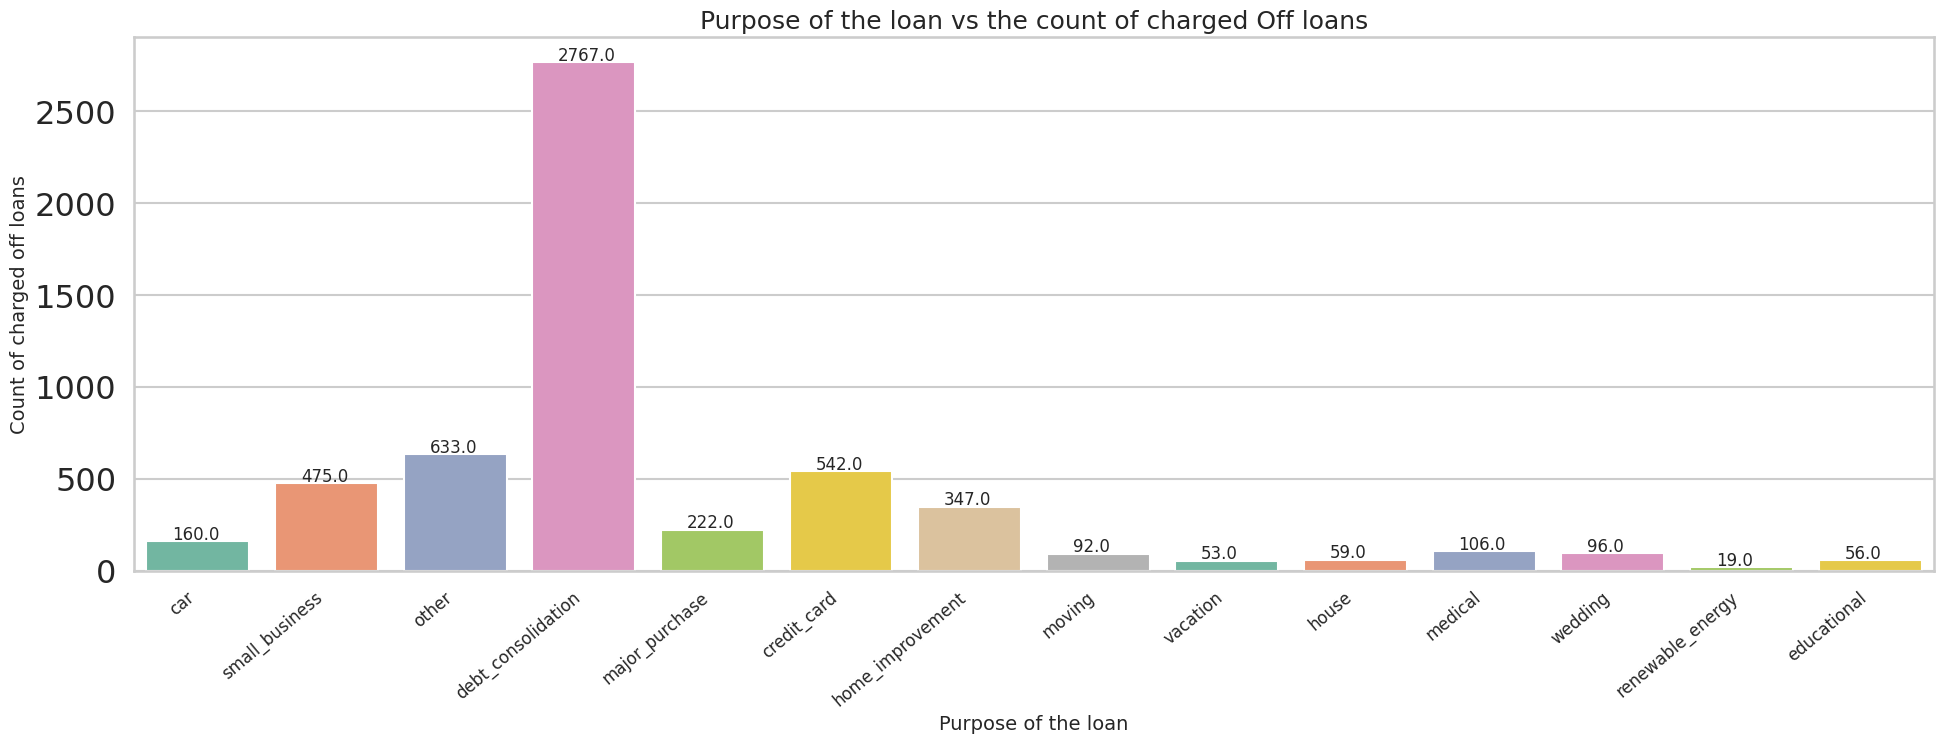

In [ ]:
# Set the font scale and style
sns.set_context("talk", font_scale=1.4)
sns.set_style("whitegrid")

# Create a count plot of the 'purpose' column
plt.figure(figsize=(20,8))
ax = sns.countplot(x='purpose', data=charged_off_loans, palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
ax.set_xlabel("Purpose of the loan", fontsize=14)
ax.set_ylabel("Count of charged off loans", fontsize=14)
plt.title('Purpose of the loan vs the count of charged Off loans', fontsize=18)

# Add labels to the bars
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.20, p.get_height()+10), fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

**Insights from Charged Off Loans Analysis**

1. The purpose 'debt_consolidation' has the highest count of charged off loans, indicating a higher risk associated with loans for this purpose. As a strategy, it may be prudent to consider minimizing loan approvals for this purpose to mitigate the risk of loan defaults.

2. Additionally, the second highest count of charged off loans is associated with the purpose 'other.' This suggests that banks should consider refining their loan purpose categories or requesting more specific information from applicants who mention 'other' as their loan purpose. Enhancing categorization can help in better risk assessment and risk management.

These insights emphasize the importance of a nuanced approach in loan approval processes, with a focus on minimizing risks associated with specific loan purposes.


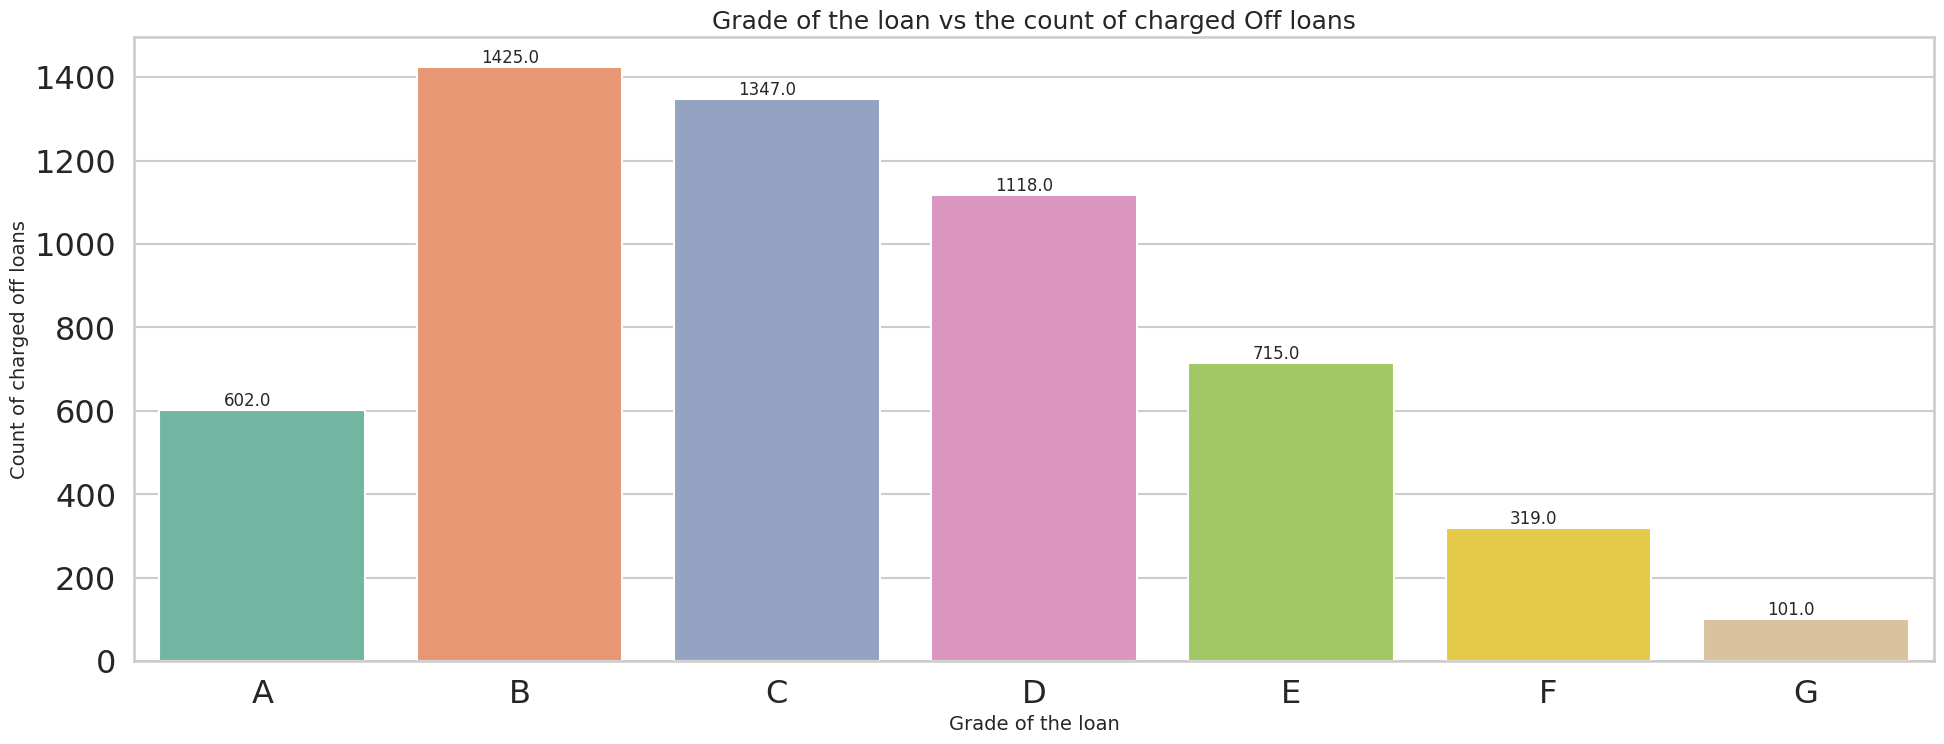

In [ ]:
# Set the font scale and style
sns.set_context("talk", font_scale=1.4)
sns.set_style("whitegrid")

# Create a count plot of the 'grade' column
plt.figure(figsize=(20,8))
ax = sns.countplot(x='grade', data=charged_off_loans.sort_values('grade'), palette='Set2')
ax.set_xlabel("Grade of the loan", fontsize=14)
ax.set_ylabel("Count of charged off loans", fontsize=14)
plt.title('Grade of the loan vs the count of charged Off loans', fontsize=18)

# Add labels to the bars
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+10), fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

**Insights on Charged Off Loans by Loan Grades**

1. Grade B loans have the highest count of charged off loans, with a total of 1,293. This suggests that loans in this grade, typically associated with moderate interest rates, pose a significant risk of default.

2. In contrast, Grade G loans have the lowest count of charged off loans at 87. Despite these loans typically having the highest interest rates due to their high risk, they constitute the smallest proportion of charged off loans. This could be attributed to stricter lending criteria or fewer borrowers qualifying for these loans.

These insights are valuable for lenders to comprehend the varying levels of risk associated with different loan grades and make informed decisions to adapt their lending practices accordingly.


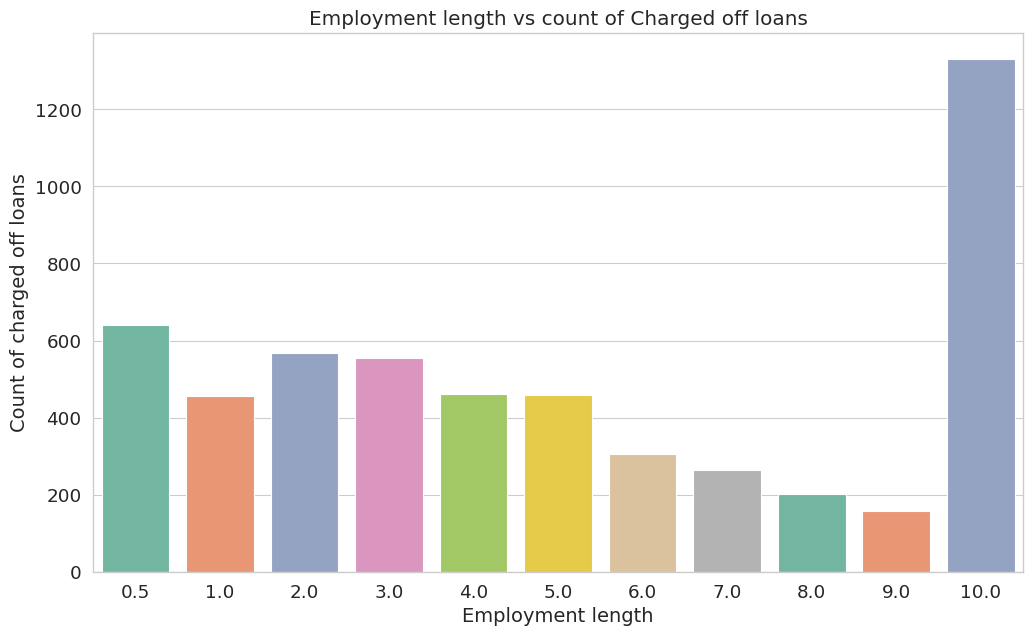

In [ ]:
plt.figure(figsize=(12,7))
sns.set_context("paper", font_scale=1.5)
ax = sns.countplot(x="emp_length", data=charged_off_loans, palette='Set2')
ax.set_xlabel("Employment length", fontsize=14)
ax.set_ylabel("Count of charged off loans", fontsize=14)
plt.title('Employment length vs count of Charged off loans')
plt.show()

**Insights on Charged Off Loans by Employment Length**

1. Individuals with an employment length of 10+ years have the highest count of charged off loans, totaling approximately 1,200. This observation suggests that these individuals, despite their long-term employment, may have accumulated more financial obligations over time, potentially leading to a higher likelihood of loan default.

2. Conversely, individuals with an employment length of 0.5 years have the lowest count of charged off loans, approximately 200. Several factors could contribute to this, such as lower financial obligations, stricter lending criteria for newer employees, or fewer newer employees qualifying for loans.

Interestingly individuals with 10+ years of employment have more charged off records than freshers, one plausible explanation is that longer-term employees might have larger loan amounts due to higher income levels and longer credit histories. They might also have more financial obligations, such as mortgages, car loans, or educational loans for their children. If they encounter sudden financial hardships like job loss or medical emergencies, they might face challenges in managing multiple payments, increasing the likelihood of loan default.

These insights offer a perspective on the impact of employment length on loan default rates and can help lenders in refining their lending practices and risk assessment.

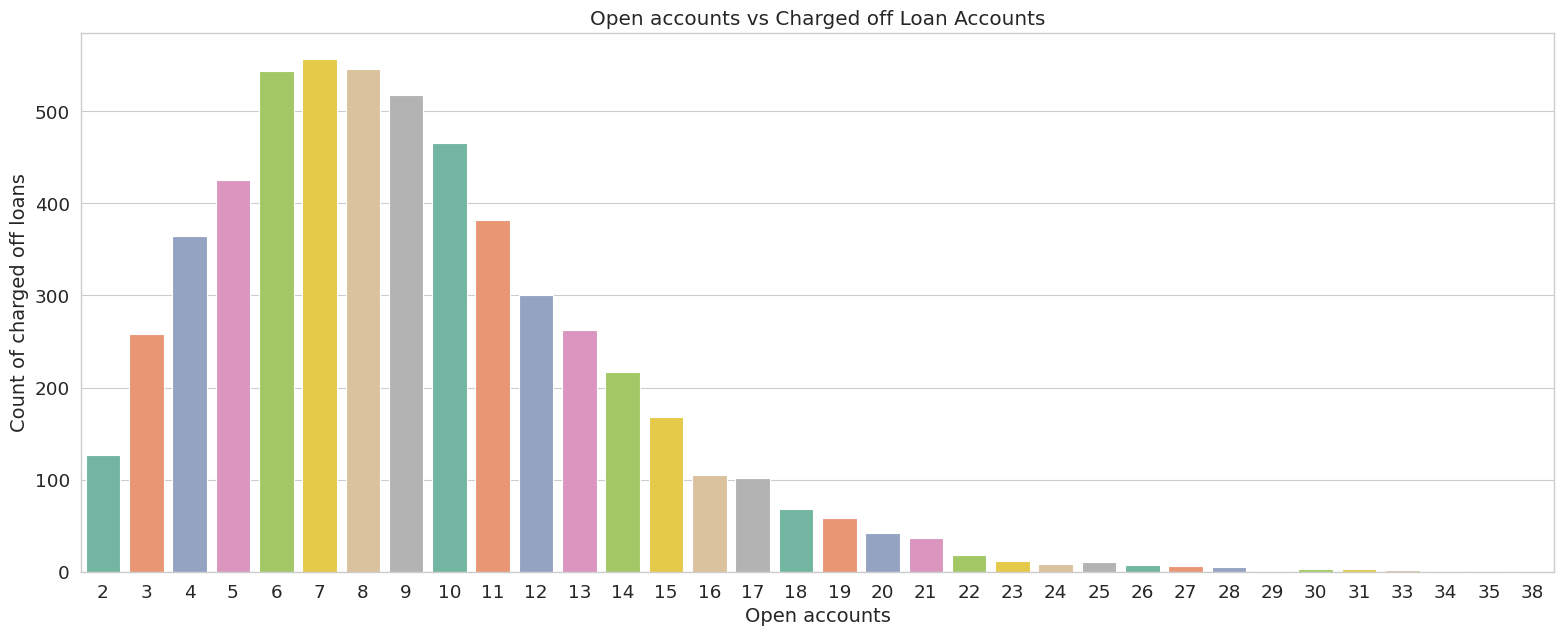

In [ ]:
# Plot of open_acc vs Loan Status
plt.figure(figsize=(19,7))
ax = sns.countplot(x="open_acc", data=charged_off_loans, palette='Set2')
ax.set_xlabel("Open accounts", fontsize=14)
ax.set_ylabel("Count of charged off loans", fontsize=14)
plt.title('Open accounts vs Charged off Loan Accounts')
plt.show()

**Relationship Between Open Accounts and Charged Off Loans**

As seen in the above plot, we examine the relationship between open accounts and the count of charged off loans. It's evident that the count of charged off loans is higher for individuals with 6-10 open accounts.

This observation highlights a potential connection between the number of open accounts and the likelihood of loan default. Borrowers with a specific range of open accounts, in this case, 6-10, appear to have a higher propensity for loan default. Lenders can consider this information when evaluating loan applications and managing risk.


## Relation between Defaulters and Non- Defaulters

In [ ]:
def PercentageOnColumnBasedOnLoanStatus(colName):
    return round(100*(df.groupby([df[colName],df['loan_status']]).size()/df.groupby([df[colName]])['loan_status'].count()),2).to_frame('percentage').reset_index()

In [ ]:
# Deriving percetage column on the basis of loan_status for column term
term_loan_status_percentage_df = PercentageOnColumnBasedOnLoanStatus('term')
term_loan_status_percentage_df

,term,loan_status,percentage
0,36 months,Charged Off,11.09
1,36 months,Fully Paid,88.91
2,60 months,Charged Off,25.31
3,60 months,Fully Paid,74.69


<Figure size 1500x600 with 0 Axes>

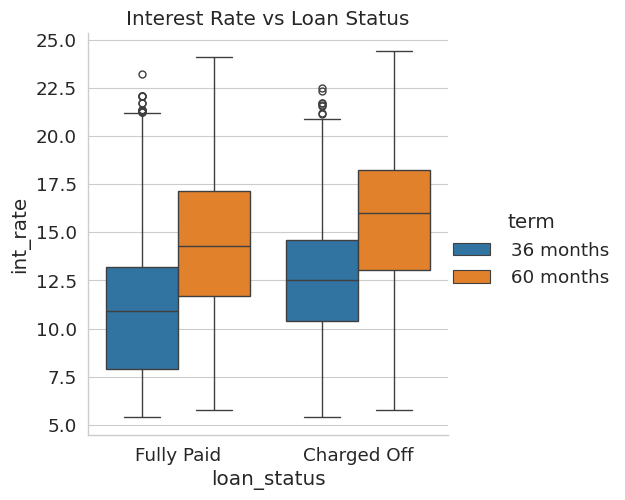

In [ ]:
# Interest rate vs Loan status

plt.figure(figsize=(15, 6))
sns.set_context("paper", font_scale=1.5)
sns.catplot(x="loan_status", y="int_rate", hue="term", kind="box", data=df)
plt.title('Interest Rate vs Loan Status')
plt.show()

**Interest Rates, Loan Terms, and Loan Outcomes**

As seen from the above plot, we observe the following trends:

1. We have more fully paid loans for lower interest rates and shorter loan terms (period). Borrowers tend to successfully repay their loans when they have favorable interest rates and shorter terms.

2. Conversely, the borrower is more likely to default with higher interest rates and longer loan terms. Higher interest rates and longer loan durations may pose challenges for borrowers in successfully repaying their loans.

These observations highlight the impact of interest rates and loan terms on loan outcomes, providing valuable insights for lenders to consider when structuring loan offers and managing risks.


In [ ]:
# Creating the new dataframe containing percentage w.r.t loan_status for every type of home ownership
home_ownership_percentage_loan_status = PercentageOnColumnBasedOnLoanStatus('home_ownership')

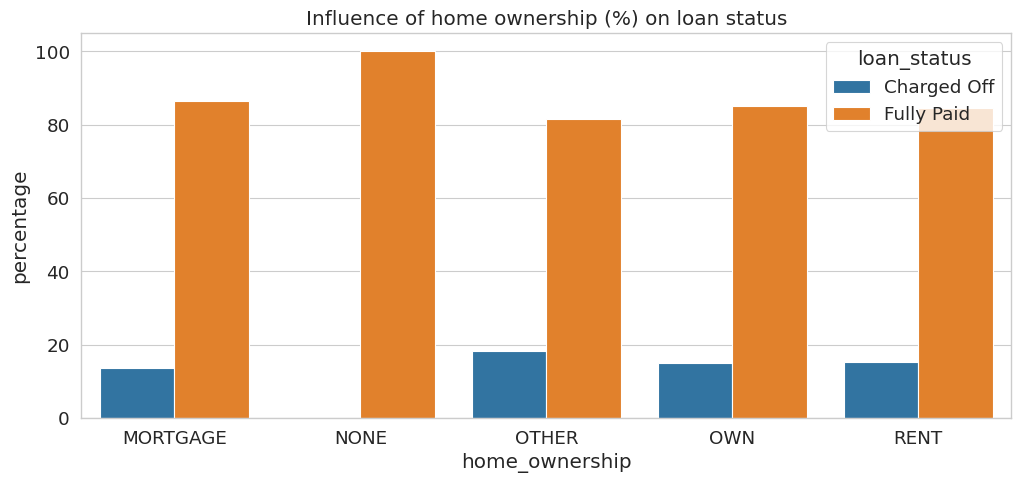

In [ ]:
# Plot of home_ownership vs loan_status
plt.figure(figsize=(12,5))
ax = sns.barplot(x = "home_ownership", y = "percentage", hue = "loan_status",data = home_ownership_percentage_loan_status)
plt.title('Influence of home ownership (%) on loan status')
plt.show()

**Insights on Home Ownership and Loan Status**

1. For Mortgage homeowners, the highest percentage of loans are Current, indicating that these borrowers are generally up-to-date with their loan payments. The percentage of Charged Off loans is the lowest for this group, suggesting that they have a lower likelihood of defaulting on their loans.

2. For Rent homeowners, the highest percentage of loans are Charged Off, indicating a higher likelihood of loan default. This could be due to various factors, such as less financial stability or higher financial obligations relative to their income.

3. For homeowners who Own their homes outright, the highest percentage of loans are Fully Paid, suggesting that these individuals are more likely to successfully repay their loans.

4. The categories labeled None have varying percentages for each loan status. However, these categories have the highest percentages for Fully Paid loans, which could indicate a higher risk associated with these types of home ownership.

These insights provide lenders with a clearer understanding of the risk associated with different types of home ownership, allowing them to tailor their lending practices and risk assessment strategies accordingly.


In [ ]:
# Creating the new dataframe containing purpose w.r.t loan_status for every type of Verification status
purpose_percentage_loan_status = PercentageOnColumnBasedOnLoanStatus('purpose')

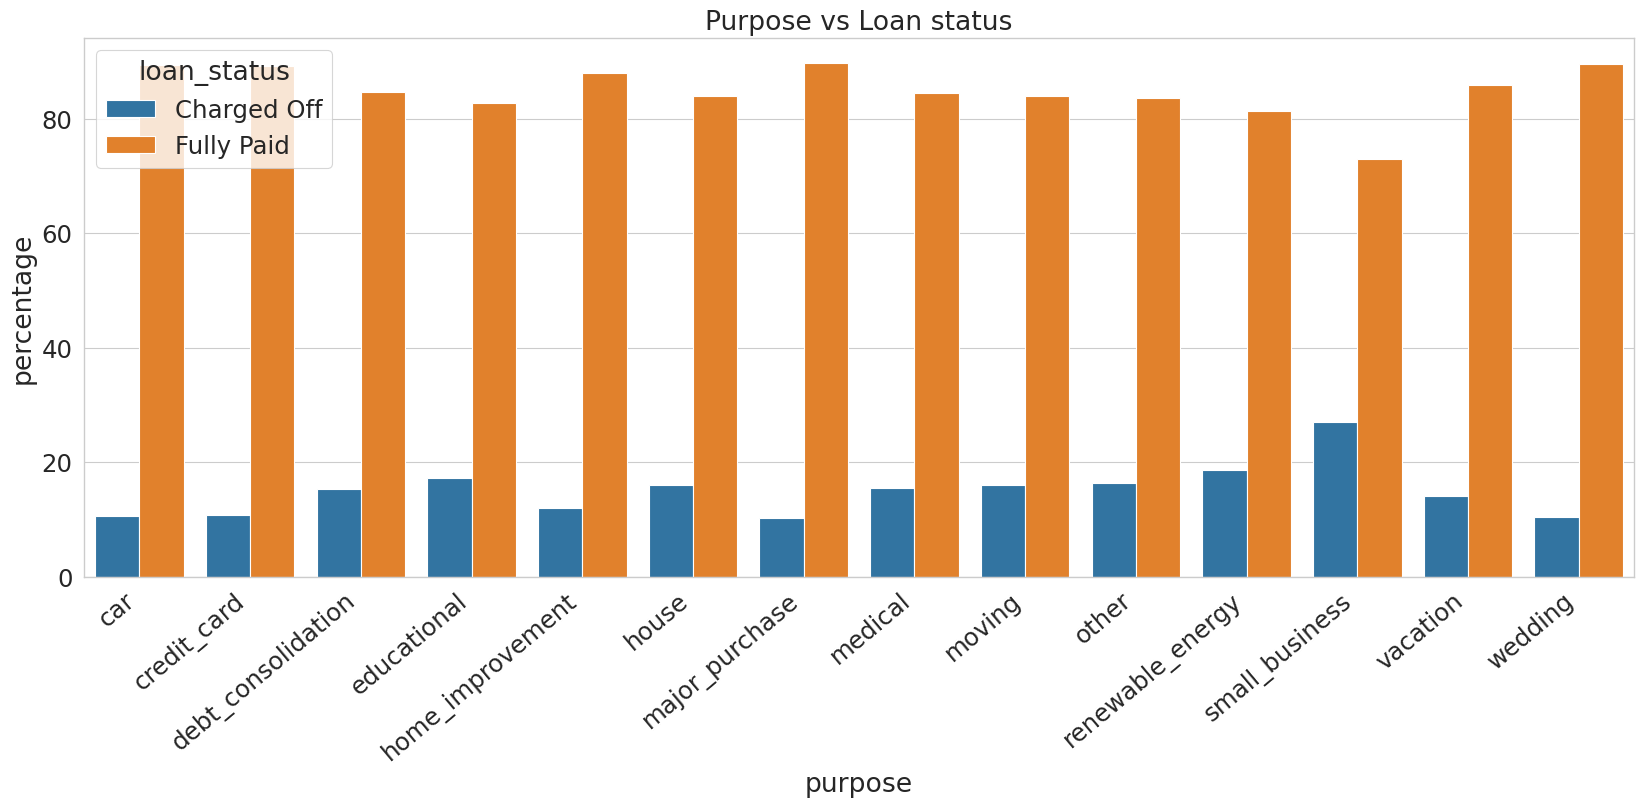

In [ ]:
plt.figure(figsize=(20,7))
sns.set_context("paper", font_scale=2)
ax = sns.barplot(x="purpose", y="percentage", hue="loan_status",data=purpose_percentage_loan_status)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Purpose vs Loan status')
plt.show()

**Impact of Loan Purpose on Charged Off Records**

The percentage of charged off records is highest for the purpose of 'small business' and the lowest for 'major purchase.' This finding can be a crucial factor to consider when making decisions on loan approvals. It suggests that loans for 'small business' purposes may carry a higher risk of default, while loans for 'major purchase' purposes tend to have a lower risk of default.

Lenders can use this information to refine their risk assessment and loan approval processes, ensuring that they make informed decisions and minimize the risk of loan default.


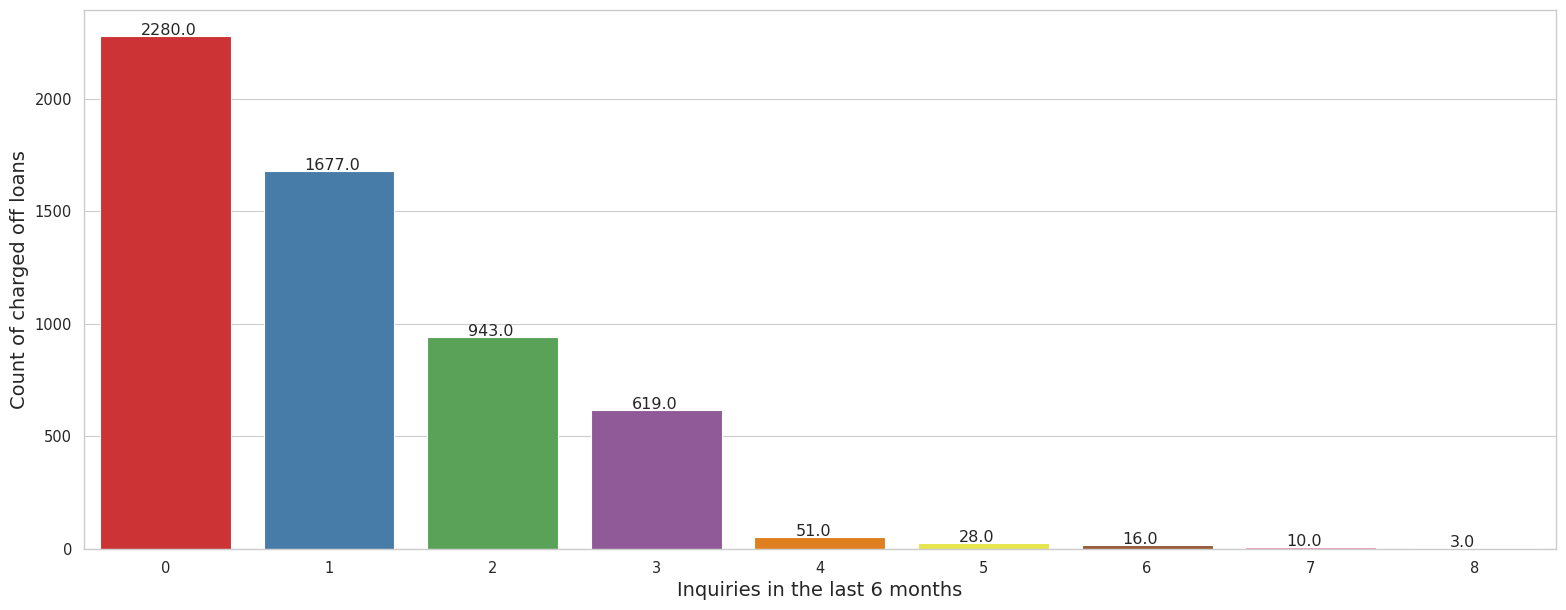

In [ ]:
#Plot of inq_last_6_mnths vs loan_status
plt.figure(figsize=(19,7))
sns.set_context("paper", font_scale=1.2)
ax = sns.countplot(x="inq_last_6mths", data=charged_off_loans, palette='Set1')
ax.set_xlabel("Inquiries in the last 6 months", fontsize=14)
ax.set_ylabel("Count of charged off loans", fontsize=14)
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+5))

**Relationship Between Inquiries in the Last 6 Months and Charged Off Loans**

As seen from the above plot, there is a noticeable trend where the count of charged off loans tends to decrease with an increase in the count of inquiries in the last 6 months.

This observation suggests that borrowers with more recent inquiries in the last 6 months may have a lower likelihood of loan default. Lenders can take this trend into account when assessing the risk associated with the number of recent inquiries made by loan applicants.


# Final Suggestions, and Key Insights

**Recommendations for Lenders:**

1. **Enhanced Risk Assessment:** Lenders should conduct a comprehensive risk assessment that takes into account the borrower's home ownership status, employment length, and loan grade. For instance, it is crucial to be cautious when lending to renters and individuals with an employment length of 10+ years, as they have shown a higher likelihood of loan default. By incorporating these factors into their assessment, lenders can make more informed decisions.

2. **Tailored Loan Products:** Given that the most common loan amount is around 5,000 dollars, lenders can consider developing tailored loan products specifically designed to meet the prevalent financial needs of borrowers in this range. This approach can attract more borrowers and enhance customer satisfaction.

3. **Promotion of Longer Loan Terms:** Lenders should consider promoting longer loan terms, such as 60 months, as they exhibit a higher likelihood of being fully paid off. This strategy aligns with borrowers' preferences for more extended repayment periods and can contribute to improved loan performance.

**Key Insights:**

1. **Home Ownership:** The data reveals significant differences in loan outcomes based on home ownership. Renters have the highest percentage of charged off loans, while mortgage holders demonstrate a higher percentage of current loans. In contrast, homeowners who own their homes outright display the highest percentage of fully paid loans. This insight underscores the importance of considering the borrower's housing situation in risk assessment.

2. **Employment Length:** Individuals with an employment length of 10+ years represent the group with the highest count of charged off loans. This finding suggests that long-term employees, despite their job stability, may have accumulated more financial obligations over time, leading to a higher likelihood of loan default. Lenders should pay special attention to this segment.

3. **Loan Grade:** The loan grade directly impacts loan performance. Grade C loans have the highest count of charged off loans, while Grade G loans have the lowest. This information is valuable for lenders when categorizing loans and setting appropriate interest rates and lending criteria.

4. **Loan Amount:** The most frequent loan amount is approximately $5,000, indicating its popularity among borrowers. Understanding this common loan size can assist lenders in offering products that align with the financial needs of their clientele.

5. **Loan Term:** Loans with longer terms, specifically 60 months, exhibit a higher percentage of fully paid loans, emphasizing the preference of borrowers for extended repayment periods. This information can guide lenders in structuring loan options.

These insights empower lenders to refine their risk assessment processes, develop tailored loan products, and make informed decisions that ultimately enhance the lending experience for both borrowers and lenders. By understanding the various borrower profiles and loan characteristics, lenders can optimize their lending practices to minimize risks and foster financial well-being.
